## 推理程序

考虑到推理速度，我们使用一个小型图文检索数据库作为样例。该数据库包含10张以及与其对应的50个标题(每张图像对应5个标题）,图像位于`data/minitest_images`下，如下所示。

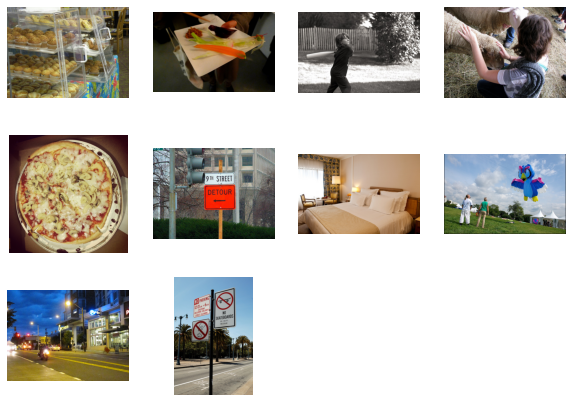

In [16]:
import os
import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(10, 10))

img_dir = 'data/minitest_images'
img_list = os.listdir(img_dir)
for i, img in enumerate(img_list):
    ax = plt.subplot(4, 4, i+1)
    img = Image.open(os.path.join(img_dir, img_list[i]))
    plt.imshow(img)
    plt.axis('off')

现在，我们来计算每张图像和每个标题的相似度:

In [9]:
from utils.inference import inference

cfg_file = 'configs/inference.yaml'
checkpoint_dir = 'exp/finetune_retrieval_22Y_02M_13D_23H/checkpoint-30'
i2t_results, t2i_results = inference(cfg_file, checkpoint_dir)

[2022-02-21 18:04:41,640] [    INFO] - Already cached /home/fuqian/.paddlenlp/models/bert-base-uncased/bert-base-uncased-vocab.txt


Load state dict from exp/finetune_retrieval_22Y_02M_13D_23H/checkpoint-30.


100%|███████████████████████████████████████████████████████| 16/16 [00:01<00:00, 13.87it/s]


其中，`i2t_results`和`t2i_results`分别为图像检索文本和文本检索图像的结果，两者均为`Dict`，其中`key`为查询，`value`为查询结果，查询结果由相似度由高到低排列。

In [14]:
print(type(i2t_results))
print(type(t2i_results))
for k, v in i2t_results.items():
    print('查询图像:', k)
    print('查询结果:', v)
    break
          
for k, v in t2i_results.items():
    print('查询文本:', k)
    print('查询结果:', v)
    break

<class 'dict'>
<class 'dict'>
查询图像: 317441
查询结果: ['A street sign above an orange detour sign.', 'A bright orange sign showing the way to a detour.', 'A wooden post with a detour sign posted on it', 'A street corner has a stoplight and detour sign.', 'This shows two street signs that say ninth street and detour', 'No skateboarding, littering, and parking street signs ', 'Street signage on post near roadway in city environment.', 'a no skate boarders sign on the side of the road ', 'A No Parking, No Skateboards and No Littering sign on a street side.', 'A city street with signs stating "no parking" and "no skateboards."']
查询文本: A street sign above an orange detour sign.
查询结果: [317441, 507921, 163852, 28675, 45057, 182279, 415746, 213008, 458755, 131089]


结果可视化:

查询图像:


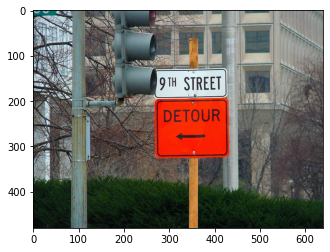

检索结果:
Top1: A street sign above an orange detour sign.
Top2: A bright orange sign showing the way to a detour.
Top3: A wooden post with a detour sign posted on it
Top4: A street corner has a stoplight and detour sign.
Top5: This shows two street signs that say ninth street and detour


In [21]:
for k, v in i2t_results.items():
    print('查询图像:')
    img = Image.open('data/minitest_images/COCO_val2014_000000%06d.jpg' % k)
    plt.imshow(img)
    plt.show()
    print('检索结果:')
    for i in range(5):
        print(f'Top{i+1}: {v[i]}')
    break

查询文本:
A street sign above an orange detour sign.
检索结果:


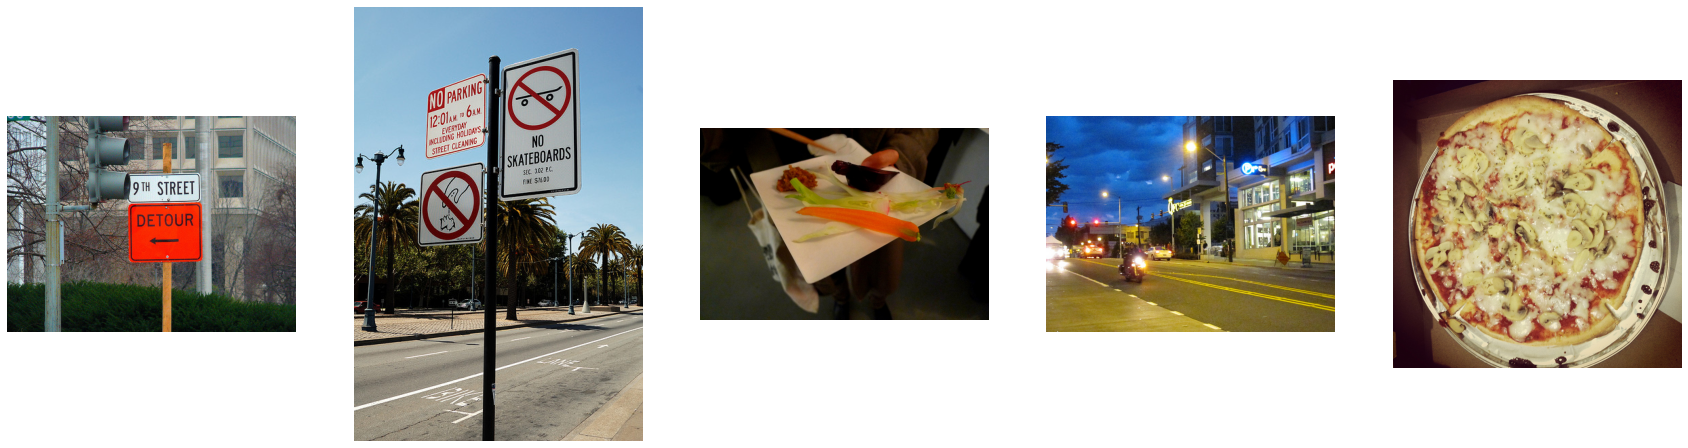

In [24]:
plt.figure(figsize=(30, 30))    
for k, v in t2i_results.items():
    print('查询文本:')
    print(k)
    print('检索结果:')
    for i in range(5):
        ax = plt.subplot(1, 5, i+1)
        img = Image.open('data/minitest_images/COCO_val2014_000000%06d.jpg' % v[i])
        plt.imshow(img)
        plt.axis('off')
    break